In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import glob
import matplotlib
#matplotlib.use('pgf')
import matplotlib.pyplot as plt


In [2]:
# Load all JSON files from experimentation_results into a DataFrame
def load_all_experimentation_results(folder_path):
    all_data = []
    
    # Get all JSON files in the folder
    json_files = glob.glob(os.path.join(folder_path, "*.json"))
    
    for file_path in json_files:
        try:
            with open(file_path, 'r') as file:
                data = json.load(file)
                # Add filename as a column for reference
                if isinstance(data, list):
                    for item in data:
                        item['source_file'] = os.path.basename(file_path)
                    all_data.extend(data)
                elif isinstance(data, dict):
                    data['source_file'] = os.path.basename(file_path)
                    all_data.append(data)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    df = pd.DataFrame(all_data)
    return df

experimentation_results_path = '../data/experimentation_results'
df_results = load_all_experimentation_results(experimentation_results_path)

# Display basic info about the loaded data
print(f"Loaded {len(df_results)} records from {len(glob.glob(os.path.join(experimentation_results_path, '*.json')))} JSON files")
print(f"Columns: {list(df_results.columns)}")

Loaded 10 records from 10 JSON files
Columns: ['experiment_id', 'training_args', 'model_config', 'tokenizer_info', 'dataset_info', 'training_metrics', 'source_file']


In [3]:
df_results = df_results[['training_args', 'tokenizer_info', 'training_metrics']]
df_results

,training_args,tokenizer_info,training_metrics
0,{'output_dir': 'bert-base-portuguese-cased-ner...,"{'model_max_length': 512, 'vocab_size': 30522,...","{'final_train_loss': None, 'log_train_metrics'..."
1,"{'output_dir': 'exp02', 'overwrite_output_dir'...","{'model_max_length': 512, 'vocab_size': 30522,...","{'final_train_loss': None, 'log_train_metrics'..."
2,"{'output_dir': 'exp03', 'overwrite_output_dir'...","{'model_max_length': 512, 'vocab_size': 28996,...","{'final_train_loss': None, 'log_train_metrics'..."
3,"{'output_dir': 'exp04', 'overwrite_output_dir'...","{'model_max_length': 512, 'vocab_size': 28996,...","{'final_train_loss': None, 'log_train_metrics'..."
4,"{'output_dir': 'exp05', 'overwrite_output_dir'...","{'model_max_length': 512, 'vocab_size': 105879...","{'final_train_loss': None, 'log_train_metrics'..."
5,"{'output_dir': 'exp06', 'overwrite_output_dir'...","{'model_max_length': 512, 'vocab_size': 119547...","{'final_train_loss': None, 'log_train_metrics'..."
6,"{'output_dir': 'exp07', 'overwrite_output_dir'...","{'model_max_length': 512, 'vocab_size': 30522,...","{'final_train_loss': None, 'log_train_metrics'..."
7,"{'output_dir': 'exp08', 'overwrite_output_dir'...","{'model_max_length': 512, 'vocab_size': 28996,...","{'final_train_loss': None, 'log_train_metrics'..."
8,"{'output_dir': 'exp09', 'overwrite_output_dir'...",{'model_max_length': 1000000000000000019884624...,"{'final_train_loss': None, 'log_train_metrics'..."
9,"{'output_dir': 'exp10', 'overwrite_output_dir'...",{'model_max_length': 1000000000000000019884624...,"{'final_train_loss': None, 'log_train_metrics'..."


In [4]:
def flatten_column(df, column_name):
    """Flatten a column containing nested dictionaries"""
    if column_name in df.columns:
        # Normalize the nested JSON data
        flattened = pd.json_normalize(df[column_name])
        # Add prefix to column names to avoid conflicts
        flattened.columns = [f"{column_name}_{col}" for col in flattened.columns]
        return flattened
    return pd.DataFrame()

# Flatten each column
flattened_training_args = flatten_column(df_results, 'training_args')
flattened_tokenizer_info = flatten_column(df_results, 'tokenizer_info')
flattened_training_metrics = flatten_column(df_results, 'training_metrics')

# Combine all flattened columns
df_flattened = pd.concat([
    flattened_training_args, 
    flattened_tokenizer_info, 
    flattened_training_metrics
], axis=1)

# Display the flattened DataFrame
print(f"Flattened DataFrame shape: {df_flattened.shape}")
print(f"Columns: {list(df_flattened.columns)}")
df_flattened.head()

Flattened DataFrame shape: (10, 175)
Columns: ['training_args_output_dir', 'training_args_overwrite_output_dir', 'training_args_do_train', 'training_args_do_eval', 'training_args_do_predict', 'training_args_eval_strategy', 'training_args_prediction_loss_only', 'training_args_per_device_train_batch_size', 'training_args_per_device_eval_batch_size', 'training_args_per_gpu_train_batch_size', 'training_args_per_gpu_eval_batch_size', 'training_args_gradient_accumulation_steps', 'training_args_eval_accumulation_steps', 'training_args_eval_delay', 'training_args_torch_empty_cache_steps', 'training_args_learning_rate', 'training_args_weight_decay', 'training_args_adam_beta1', 'training_args_adam_beta2', 'training_args_adam_epsilon', 'training_args_max_grad_norm', 'training_args_num_train_epochs', 'training_args_max_steps', 'training_args_lr_scheduler_type', 'training_args_warmup_ratio', 'training_args_warmup_steps', 'training_args_log_level', 'training_args_log_level_replica', 'training_args_l

,training_args_output_dir,training_args_overwrite_output_dir,training_args_do_train,training_args_do_eval,training_args_do_predict,training_args_eval_strategy,training_args_prediction_loss_only,training_args_per_device_train_batch_size,training_args_per_device_eval_batch_size,training_args_per_gpu_train_batch_size,...,training_metrics_final_eval_metrics.eval_ORGANIZATION.f1,training_metrics_final_eval_metrics.eval_ORGANIZATION.number,training_metrics_final_eval_metrics.eval_PERSON.precision,training_metrics_final_eval_metrics.eval_PERSON.recall,training_metrics_final_eval_metrics.eval_PERSON.f1,training_metrics_final_eval_metrics.eval_PERSON.number,training_metrics_final_eval_metrics.eval_runtime,training_metrics_final_eval_metrics.eval_samples_per_second,training_metrics_final_eval_metrics.eval_steps_per_second,training_metrics_final_eval_metrics.epoch
0,bert-base-portuguese-cased-ner-finetuned,False,False,True,False,epoch,False,8,8,None,...,0.796875,183,0.922581,0.947020,0.934641,302,1.2216,183.370,22.921,5.0
1,exp02,False,False,True,False,epoch,False,8,8,None,...,0.842105,183,0.935065,0.953642,0.944262,302,15.7308,14.240,1.780,5.0
2,exp03,False,False,True,False,epoch,False,8,8,None,...,0.823529,183,0.865204,0.913907,0.888889,302,1.3328,168.069,21.009,5.0
3,exp04,False,False,True,False,epoch,False,8,8,None,...,0.851752,183,0.936877,0.933775,0.935323,302,3.0290,73.953,9.244,5.0
4,exp05,False,False,True,False,epoch,False,8,8,None,...,0.888889,183,0.960526,0.966887,0.963696,302,0.8772,255.351,31.919,5.0


In [5]:
df_flattened = df_flattened[['training_args_output_dir',
                             'tokenizer_info_model_name',
                             'training_args_learning_rate',
                             'training_args_num_train_epochs',
                             'training_metrics_log_train_metrics']]
                            #  'training_metrics_final_eval_metrics.eval_loss', 
                            #  'training_metrics_final_eval_metrics.eval_precision', 
                            #  'training_metrics_final_eval_metrics.eval_recall', 
                            #  'training_metrics_final_eval_metrics.eval_f1', 
                            #  'training_metrics_final_eval_metrics.eval_accuracy', 
                            #  'training_metrics_final_eval_metrics.eval_DATE.precision', 
                            #  'training_metrics_final_eval_metrics.eval_DATE.recall', 
                            #  'training_metrics_final_eval_metrics.eval_DATE.f1', 
                            #  'training_metrics_final_eval_metrics.eval_DATE.number', 
                            #  'training_metrics_final_eval_metrics.eval_LOCATION.precision', 
                            #  'training_metrics_final_eval_metrics.eval_LOCATION.recall', 
                            #  'training_metrics_final_eval_metrics.eval_LOCATION.f1', 
                            #  'training_metrics_final_eval_metrics.eval_LOCATION.number', 
                            #  'training_metrics_final_eval_metrics.eval_OCCUPATION.precision', 
                            #  'training_metrics_final_eval_metrics.eval_OCCUPATION.recall', 
                            #  'training_metrics_final_eval_metrics.eval_OCCUPATION.f1', 
                            #  'training_metrics_final_eval_metrics.eval_OCCUPATION.number', 
                            #  'training_metrics_final_eval_metrics.eval_ORGANIZATION.precision', 
                            #  'training_metrics_final_eval_metrics.eval_ORGANIZATION.recall', 
                            #  'training_metrics_final_eval_metrics.eval_ORGANIZATION.f1', 
                            #  'training_metrics_final_eval_metrics.eval_ORGANIZATION.number', 
                            #  'training_metrics_final_eval_metrics.eval_PERSON.precision', 
                            #  'training_metrics_final_eval_metrics.eval_PERSON.recall', 
                            #  'training_metrics_final_eval_metrics.eval_PERSON.f1', 
                            #  'training_metrics_final_eval_metrics.eval_PERSON.number', 
                            #  'training_metrics_final_eval_metrics.eval_runtime', 
                            #  'training_metrics_final_eval_metrics.eval_samples_per_second', 
                            #  'training_metrics_final_eval_metrics.eval_steps_per_second', 
                            #  'training_metrics_final_eval_metrics.epoch']]
df_flattened
                             

,training_args_output_dir,tokenizer_info_model_name,training_args_learning_rate,training_args_num_train_epochs,training_metrics_log_train_metrics
0,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,"[{'eval_loss': 0.2367064654827118, 'eval_preci..."
1,exp02,bert-large-uncased,0.00002,5,"[{'eval_loss': 0.1526961624622345, 'eval_preci..."
2,exp03,bert-base-cased,0.00002,5,"[{'eval_loss': 0.2149171680212021, 'eval_preci..."
3,exp04,bert-large-cased,0.00002,5,"[{'eval_loss': 0.1627541482448578, 'eval_preci..."
4,exp05,bert-base-multilingual-uncased,0.00002,5,"[{'eval_loss': 0.11396384239196777, 'eval_prec..."
5,exp06,bert-base-multilingual-cased,0.00002,5,"[{'eval_loss': 0.1642168015241623, 'eval_preci..."
6,exp07,bert-large-uncased-whole-word-masking,0.00002,5,"[{'eval_loss': 0.1080750823020935, 'eval_preci..."
7,exp08,bert-large-cased-whole-word-masking,0.00002,5,"[{'eval_loss': 0.12331575900316238, 'eval_prec..."
8,exp09,neuralmind/bert-base-portuguese-cased,0.00002,5,"[{'eval_loss': 0.14012670516967773, 'eval_prec..."
9,exp10,neuralmind/bert-large-portuguese-cased,0.00002,5,"[{'eval_loss': 0.1049007847905159, 'eval_preci..."


In [6]:
# Explode the training_metrics_log_train_metrics column to get one row per epoch per experiment
df_exploded = df_flattened.explode('training_metrics_log_train_metrics').reset_index(drop=True)

# Flatten the exploded training metrics to get individual epoch metrics as columns
if 'training_metrics_log_train_metrics' in df_exploded.columns:
    # Normalize the training metrics for each epoch
    epoch_metrics = pd.json_normalize(df_exploded['training_metrics_log_train_metrics'])
    
    # Add prefix to avoid column name conflicts
    epoch_metrics.columns = [f"epoch_{col}" for col in epoch_metrics.columns]
    
    # Drop the original column and concatenate with the flattened epoch metrics
    df_final = pd.concat([
        df_exploded.drop('training_metrics_log_train_metrics', axis=1),
        epoch_metrics
    ], axis=1)
else:
    df_final = df_exploded

# Display the result
print(f"Final DataFrame shape: {df_final.shape}")
print(f"Columns: {list(df_final.columns)}")
df_final.head(10)  # Show first 10 rows to see multiple epochs

Final DataFrame shape: (71, 39)
Columns: ['training_args_output_dir', 'tokenizer_info_model_name', 'training_args_learning_rate', 'training_args_num_train_epochs', 'epoch_eval_loss', 'epoch_eval_precision', 'epoch_eval_recall', 'epoch_eval_f1', 'epoch_eval_accuracy', 'epoch_eval_runtime', 'epoch_eval_samples_per_second', 'epoch_eval_steps_per_second', 'epoch_epoch', 'epoch_step', 'epoch_eval_DATE.precision', 'epoch_eval_DATE.recall', 'epoch_eval_DATE.f1', 'epoch_eval_DATE.number', 'epoch_eval_LOCATION.precision', 'epoch_eval_LOCATION.recall', 'epoch_eval_LOCATION.f1', 'epoch_eval_LOCATION.number', 'epoch_eval_OCCUPATION.precision', 'epoch_eval_OCCUPATION.recall', 'epoch_eval_OCCUPATION.f1', 'epoch_eval_OCCUPATION.number', 'epoch_eval_ORGANIZATION.precision', 'epoch_eval_ORGANIZATION.recall', 'epoch_eval_ORGANIZATION.f1', 'epoch_eval_ORGANIZATION.number', 'epoch_eval_PERSON.precision', 'epoch_eval_PERSON.recall', 'epoch_eval_PERSON.f1', 'epoch_eval_PERSON.number', 'epoch_train_runtime',

,training_args_output_dir,tokenizer_info_model_name,training_args_learning_rate,training_args_num_train_epochs,epoch_eval_loss,epoch_eval_precision,epoch_eval_recall,epoch_eval_f1,epoch_eval_accuracy,epoch_eval_runtime,...,epoch_eval_ORGANIZATION.number,epoch_eval_PERSON.precision,epoch_eval_PERSON.recall,epoch_eval_PERSON.f1,epoch_eval_PERSON.number,epoch_train_runtime,epoch_train_samples_per_second,epoch_train_steps_per_second,epoch_total_flos,epoch_train_loss
0,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.236706,0.699074,0.713225,0.706079,0.938021,1.0013,...,183.0,0.873418,0.913907,0.893204,302.0,NaN,NaN,NaN,NaN,NaN
1,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.109544,0.859477,0.887314,0.873174,0.971613,1.0067,...,183.0,0.830769,0.894040,0.861244,302.0,NaN,NaN,NaN,NaN,NaN
2,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.084246,0.845818,0.914305,0.878729,0.978809,1.0085,...,183.0,0.928105,0.940397,0.934211,302.0,NaN,NaN,NaN,NaN,NaN
3,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.074462,0.887821,0.934548,0.910585,0.983986,1.0161,...,183.0,0.935065,0.953642,0.944262,302.0,NaN,NaN,NaN,NaN,NaN
4,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.069732,0.907612,0.941296,0.924147,0.986262,1.0061,...,183.0,0.922581,0.947020,0.934641,302.0,NaN,NaN,NaN,NaN,NaN
5,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37.1996,60.753,7.661,2.921372e+14,0.271891
6,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.069732,0.907612,0.941296,0.924147,0.986262,1.2216,...,183.0,0.922581,0.947020,0.934641,302.0,NaN,NaN,NaN,NaN,NaN
7,bert-base-portuguese-cased-ner-finetuned,bert-base-uncased,0.00002,5,0.069732,0.907612,0.941296,0.924147,0.986262,1.1599,...,183.0,0.922581,0.947020,0.934641,302.0,NaN,NaN,NaN,NaN,NaN
8,exp02,bert-large-uncased,0.00002,5,0.152696,0.672956,0.794197,0.728567,0.962539,6.4416,...,183.0,0.585678,0.758278,0.660895,302.0,NaN,NaN,NaN,NaN,NaN
9,exp02,bert-large-uncased,0.00002,5,0.075921,0.862595,0.914980,0.888016,0.982678,6.6792,...,183.0,0.900958,0.933775,0.917073,302.0,NaN,NaN,NaN,NaN,NaN


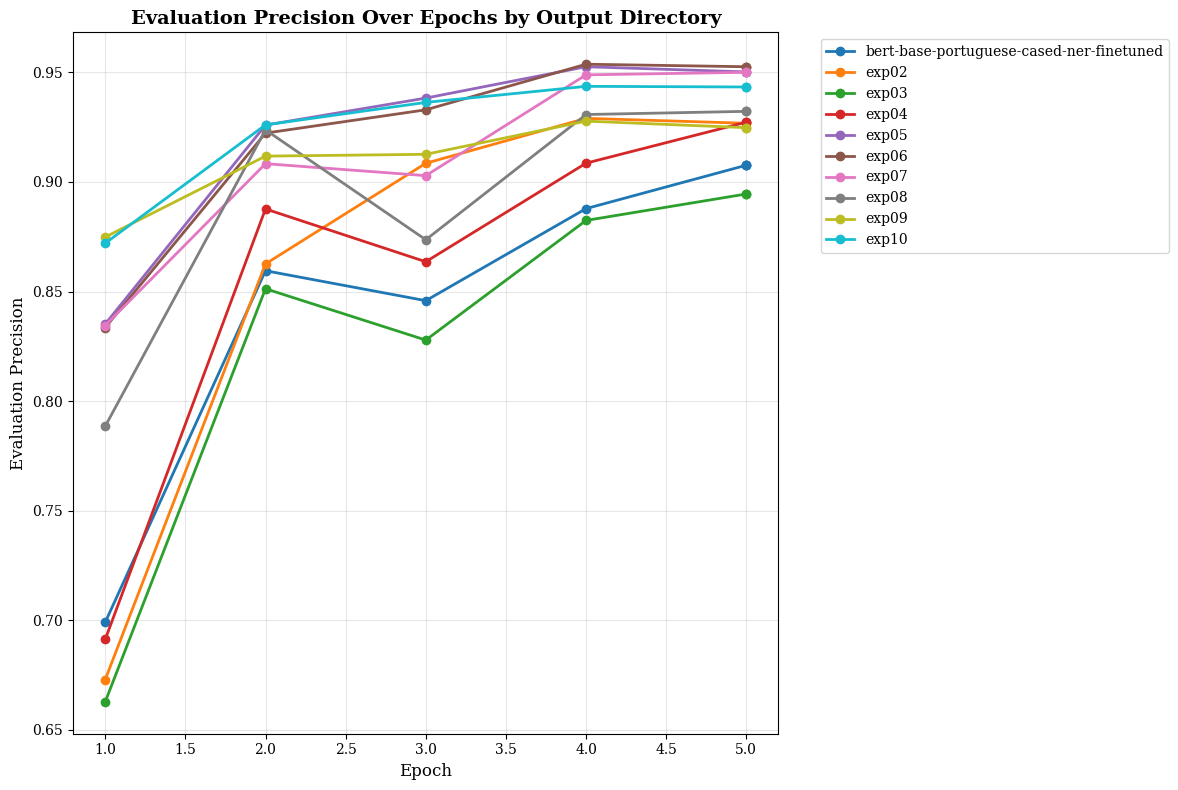

In [ ]:
# Create the line plot
plt.figure(figsize=(12, 8))

# Get unique output directories
unique_dirs = df_final['training_args_output_dir'].unique()

# Plot a line for each output_dir
for output_dir in unique_dirs:
    # Filter data for current output_dir
    dir_data = df_final[df_final['training_args_output_dir'] == output_dir]
    
    # Sort by epoch to ensure proper line connection
    dir_data = dir_data.sort_values('epoch_epoch')
    
    # Plot the line
    plt.plot(dir_data['epoch_epoch'], dir_data['epoch_eval_precision'], 
             marker='o', linewidth=2, markersize=6, label=output_dir)

# Customize the plot
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Evaluation Precision', fontsize=12)
plt.title('Evaluation Precision Over Epochs by Output Directory', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save as PDF for LaTeX
plt.savefig('c:\\Users\\arthu\\Documents\\GitHub\\ner-using-bert\\evaluation_precision_plot.pdf', 
            format='pdf', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()